# Prediction of clinical outcome from antibody profiles of HIV cohort

<b>Presenter: Jong Shin<br>
Course: BIOF 399<br>
Date: 12/9/2019<br></b>

## 1. Examining the project dataset

### 1.1 Import modules

In [19]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Load file

In [817]:
df_HIV = pd.read_excel('17_N_0145_clinical_LIPS.xlsx')

### 1.3 Head of the data

In [656]:
df_HIV.head()

,ID,p24 avg,gp120 avg,gp41 avg,MA avg,TAT avg,IN avg,PR avg,RT avg,NC avg,CMV avg,EBV avg,Sample ID,Sample Date,NIHNumber,VisitDate,Date of Birth,Enrollment Age,Gender M0 F1,Race W1 B2 Other3 Asian4 Indian5 Unknown6,White,Black,Hawaiian or Pacific,Asian,Indian,Other Race,Hispanic 1,HIV,Employed No 0. Yes 1.,Current smoker No 0. Yes 1.,Past smoker No 0. Yes 1.,Drinks Per Day,Drinks Per Week,Has Alcohol Affected Life? No 0. Yes 1.,Ever used amphetamines? No 0. Yes 1.,Ever used cocaine? No 0. Yes 1.,Ever used ecstasy? No 0. Yes 1.,Ever used hallucinogens? No 0. Yes 1.,Ever used heroin? No 0. Yes 1.,Ever used marijuana? No 0. Yes 1.,Ever used narcotics? No 0. Yes 1.,Ever used special K? No 0. Yes 1.,Problem cocaine in past,Problem heroin in past,Problem ecstasy in past,Problem PCP in past,Problem meth in past,egfr,creat,vitb12,folate,glucose,insulin,hgb a1c,chol,triglyc,cholhdl,ldl chol calc,c react prot,d dimer,tsh,freet4,anti hcv,hcv rna quant,hbsag,VisitDate.1,HTLVAntibody,bmi,bp sys,bp dys,Aspirin,Statin,BP Med,More than one BP med,TenYr ASCVDRisk,Lifetime ASCVDRisk,VisitDate.2,wbc csf,rbc count csf,protein csf,glucose csf,VisitDate.3,CSF HIV RNA,CSF escape,NFL,Ab40,Ab42,Tau,IL6,IL10,TNFa,Plasma HIV RNA,cd4,Date of HIV diagnosis,Nadir CD4,Date of ART start,Current ART Regimen,Current AZT,Ever AZT,Current ddrug,Ever ddrug,Current efavirenz,Ever efavirenz,Current NRTI,Ever NRTI,Current NNRTI,Ever NNRTI,Current Protease,Ever Protease,Current Integrase,Ever Integrase,Current EntryInhibitor,Ever EntryInhibitor,Current RILP,Ever RILP,Duration RILP,AnteriorCerebralArtery,MiddleCerebralArtery,LeftThalamus,RightThalamus,ThalamusVolFraction,LeftCaudate,RightCaudate,CaudateVolFraction,LeftPutamen,RightPutamen,PutamenVolFraction,LeftHippocampus,RightHippocampus,TotalHippocampus,LeftAmygdala,RightAmygdala,WholeAmygdala,CSFVolFraction,CorticalGrayMatterVolFraction,TotalWhiteMatterVolFraction,SubcorticalGrayMatterVolFraction,TotalGreyMatterVolFraction,WholeBrainFraction,IntracranialVolume,ManualLesionVol,BrainAtrophy,LesionLoad,GDS,Overall TScore,HANDDiagnosis,Education,WTAR std,TFLS Total T,BDI Total,IADL Score,Attention/Working Memory Domain,Executive Functioning Domain,Information Processing Domain,Verbal Fluency Domain,Learning Domain,Psychomotor Domain,Memory Domain,ralph wbc,ralph segs,ralph bands,ralph lymphs,ralph monos,ralph eos,ralph baso,ralph cd3,ralph total c3,ralph cd4,ralph total c4,ralph cd8,ralph total c8,ralph cd4 8,ralph cd14,ralph cd19,ralph cd16 56,ralph cd4 ron,ralph cd4 rop,ralph cd8 ron,ralph cd8 rop,ralph cd3 38 dr,ralph cd3 dr,ralph cd3 38,ralph cd4 38 dr,ralph cd4 dr,ralph cd4 38,ralph cd8 38 dr,ralph cd8 dr,ralph cd8 38,ralph cd3 25,ralph cd4 25,ralph cd8 25,ralph cd4 27,ralph cd8 27,ralph cd4 na,ralph cd4 mem,ralph cd8 na,ralph cd8 mem,ralph cd4 27n rop,ralph cd4 27p rop,ralph cd4 27n ron,ralph cd8 27n rop,ralph cd8 27p rop,ralph cd8 27n ron,ralph cd3 ma251,ralph cd4 ma251,ralph cd8 ma251,ralph cd3 95,ralph cd4 95,ralph cd8 95,ralph comments,ralph flow type,urine amphetamines,urine benzodiazepine,urine cocaine metabolites,opiates ur,urine cannabinoids thc,RNFL OD,RNFL OS,Avg RNFL,GCIPL OD,GCIPL OS,Avg GCIPL,Cup to Disc OD,Cup to Disc OS,Cup to Disc Average,Mac OD,Mac OS,Mac Average,Snellen OD,Snellen OS,RNFL OD N,RNFL OD S,RNFL OD T,RNFL OD I,RNFL OS N,RNFL OS S,RNFL OS T,RNFL OS I,GCIPL OD SN,GCIPL OD S,GCIPL OD ST,GCIPL OD IT,GCIPL OD I,GCIPL OD IN,GCIPL OS SN,GCIPL OS S,GCIPL OS ST,GCIPL OS IT,GCIPL OS I,GCIPL OS IN
0,P227596,1.849786e+06,520696.33330,836259.3333,2.154439e+06,84436.33333,5.401620e+05,1.052631e+06,1.336720e+06,5.476667e+03,1.280595e+06,6.881363e+05,P227596,11/09/2018,7060592,2018-11-09,1956-01-08,62,0,2,0,1,0,0,0,0,0,1,0.0,1.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61,1.41,549.0,11.8,104,4.7,4.6,202.0,89.0,80.0,105.0,3.9,1.74,2.29,NaN,1,0.0,0,2018-11-09,0,16.00,128.0,60.0,1.0,0.0,1.0,1.0,20.9,NaN,2018-11-09,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.

Extract antibody profiles from the dataset

In [680]:
df_HIV.shape

(156, 250)

There are <b>156</b> patient samples and <b>~250</b> features

In [687]:
print('HIV positive:', len(df_HIV[df_HIV['HIV'] == 1]),
      '\nControls:', len(df_HIV[df_HIV['HIV'] == 0]))

HIV positive: 122 
Controls: 34


In [689]:
df_HIV_pos = df_HIV[df_HIV['HIV'] == 1]
df_HIV_neg = df_HIV[df_HIV['HIV'] == 0]

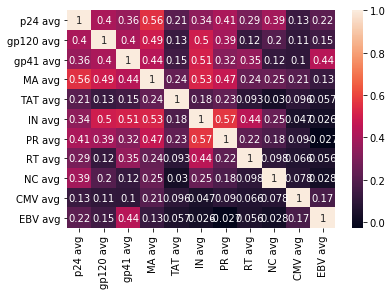

In [712]:
sns.heatmap(df_HIV_pos.iloc[:,0:12].corr(), annot=True);

In [791]:
corr_HIV_pos.iloc[0:11,0:11]

,p24 avg,gp120 avg,gp41 avg,MA avg,TAT avg,IN avg,PR avg,RT avg,NC avg,CMV avg,EBV avg
p24 avg,1.000000,0.404640,0.362128,0.555388,0.213172,0.339487,0.409708,0.288195,0.387243,0.132813,0.219905
gp120 avg,0.404640,1.000000,0.403430,0.494393,0.125878,0.495248,0.391742,0.120877,0.198354,0.109449,0.148398
gp41 avg,0.362128,0.403430,1.000000,0.437308,0.148731,0.511068,0.319932,0.354730,0.121506,0.102413,0.436512
MA avg,0.555388,0.494393,0.437308,1.000000,0.238749,0.526537,0.471778,0.244683,0.250148,0.205412,0.127965
TAT avg,0.213172,0.125878,0.148731,0.238749,1.000000,0.182431,0.231711,0.092500,0.029690,0.096007,0.056859
IN avg,0.339487,0.495248,0.511068,0.526537,0.182431,1.000000,0.566859,0.444442,0.247914,0.046634,0.025662
PR avg,0.409708,0.391742,0.319932,0.471778,0.231711,0.566859,1.000000,0.223390,0.179895,0.089670,-0.026810
RT avg,0.288195,0.120877,0.354730,0.244683,0.092500,0.444442,0.223390,1.000000,0.098238,0.066146,0.056037
NC avg,0.387243,0.198354,0.121506,0.250148,0.029690,0.247914,0.179895,0.098238,1.000000,0.078255,0.028063
CMV avg,0.132813,0.109449,0.102413,0.205412,0.096007,0.046634,0.089670,0.066146,0.078255,1.000000,0.169879


In [787]:
#print(df_HIV_pos.iloc[0][1])
corr_HIV_pos = df_HIV_pos.corr()
#print(corr_HIV_pos.iloc[0][1])

for i in range(11):
    for j in range(11):
        if corr_HIV_pos.iloc[i][j] > 0.4 and corr_HIV_pos.iloc[i][j] < 1:
            print('[', corr_HIV_pos.index[i], '] & [' , corr_HIV_pos.columns[j], ']:' , corr_HIV_pos.iloc[i][j])

[ p24 avg ] & [ gp120 avg ]: 0.4046399809780165
[ p24 avg ] & [ MA avg ]: 0.5553877076623049
[ p24 avg ] & [ PR avg ]: 0.4097079420933916
[ gp120 avg ] & [ p24 avg ]: 0.4046399809780165
[ gp120 avg ] & [ gp41 avg ]: 0.4034303695163847
[ gp120 avg ] & [ MA avg ]: 0.4943926677042078
[ gp120 avg ] & [ IN avg ]: 0.4952480629345913
[ gp41 avg ] & [ gp120 avg ]: 0.4034303695163847
[ gp41 avg ] & [ MA avg ]: 0.4373084715961019
[ gp41 avg ] & [ IN avg ]: 0.5110676979853719
[ gp41 avg ] & [ EBV avg ]: 0.4365119721424974
[ MA avg ] & [ p24 avg ]: 0.5553877076623049
[ MA avg ] & [ gp120 avg ]: 0.4943926677042078
[ MA avg ] & [ gp41 avg ]: 0.4373084715961019
[ MA avg ] & [ IN avg ]: 0.526536829006923
[ MA avg ] & [ PR avg ]: 0.47177813539747776
[ IN avg ] & [ gp120 avg ]: 0.4952480629345913
[ IN avg ] & [ gp41 avg ]: 0.5110676979853719
[ IN avg ] & [ MA avg ]: 0.526536829006923
[ IN avg ] & [ PR avg ]: 0.5668588531142351
[ IN avg ] & [ RT avg ]: 0.44444186747795117
[ PR avg ] & [ p24 avg ]: 0.4097

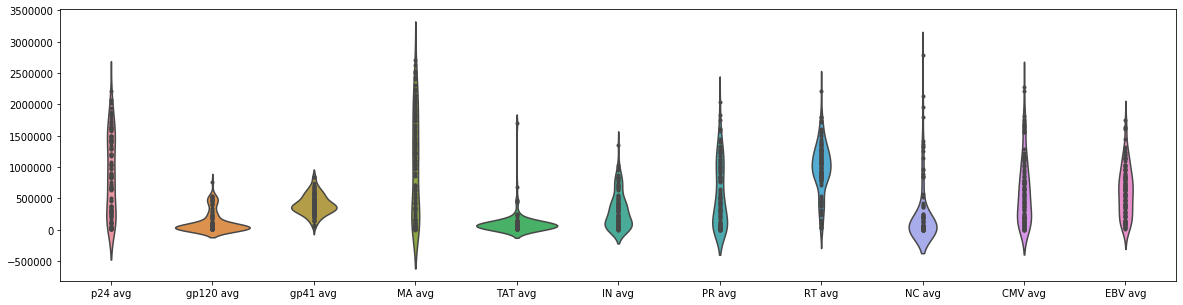

In [788]:
#sns.boxplot(df_HIV_pos.iloc[:,0])
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
sns.violinplot(data=df_HIV_pos.iloc[:,0:12], inner='points', ax=ax);

## 2. Predicting HIV status based on antibody profile

### 2.1 Normalize the dataset using MinMaxScaler

In [794]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

nrml_LIPS = min_max_scaler.fit_transform(df_HIV.iloc[:,1:12])

In [798]:
nrml_LIPS.shape
#print('[', df_HIV.index[1:12], '] & [' , df_HIV.columns[1:12], ']:')

(156, 11)

### 2.2 Prediction by KNN  

In [801]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [936]:
def KNN_predict(X, y, lst_val):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    y_test_dp = y_test[y_test!=0].dropna()
    #x_test_dp = X_test[X_test!=0].dropna()
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    scores = cross_validate(neigh, X_train, y_train, cv=15)
    
    print('Accuracy without CV:', accuracy_score(y_test, y_pred),
         '\nAccuracy after CV:', scores['test_score'].mean())
    if lst_val:    
        print(np.column_stack((y_test, y_pred)))
    #np_dp = np.trim_zeros(np_dp.any(axis=1))
    #print(np.trim_zeros(np_dp.any(axis=1)))
    #print(np_dp.remove(0))
    #print(np.column_stack((y_test, y_pred, np_dp)))

In [937]:
KNN_predict(nrml_LIPS, df_HIV['HIV'], True)

Accuracy without CV: 1.0 
Accuracy after CV: 0.9666666666666667
[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


### 2.3 Prediction by LinearSVC

In [809]:
from sklearn.svm import LinearSVC

In [1062]:
def optimized_LinearSVC(X, y, tsize):
    x_ax =[]
    max_val = []
    max_acc = []
    max_tsize = []
    max_c = []
    list_dc = {}
    j = 0
    #max_tsize = 1
    #max_rnd = 1
    count = 15
    trange = 10
    for _ in range(count):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize)
        for i in range(1,trange):
            #for j in range(1,rnd):

                svc=LinearSVC(max_iter=1000, C=i/1000)
                SVC_model=svc.fit(X_train , y_train)
                svc_score=SVC_model.score(X_test , y_test)
                #if max_val < svc_score:
                #    max_val, max_tsize, max_rnd = svc_score, i, j
                max_val.append(svc_score)
                max_tsize.append(i/1000)
                if i % 100 == 0:
                    print(trange-i, 'iteration(s) left')

        max_acc.append(np.mean(max_val))
        max_c.append(np.mean(max_tsize))
        max_val = []
        max_tsize = []
        #print('Accuracy:', max_val, '\n'
        #  'Optimal C value:', max_tsize/1000)

    
    list_dc = {'Accuracy': max_acc, 'Optimal C': max_c}
        
    tb_max = pd.DataFrame(data=list_dc)
    
    print(tb_max.head(len(max_acc)))
    
    print('\nMean Accuracy over', count, 'iterations:', np.mean(max_acc),
         '\nMean optimal C over', count, 'iterations:', np.mean(max_c)
         
         )
    
    #return max_val, max_tsize, max_rnd

optimized_LinearSVC(nrml_LIPS, df_HIV['HIV'], 0.096)

    Accuracy  Optimal C
0   0.733333      0.005
1   0.466667      0.005
2   0.733333      0.005
3   0.866667      0.005
4   0.666667      0.005
5   0.866667      0.005
6   0.866667      0.005
7   0.866667      0.005
8   0.666667      0.005
9   0.666667      0.005
10  0.800000      0.005
11  0.733333      0.005
12  0.800000      0.005
13  0.733333      0.005
14  0.866667      0.005

Mean Accuracy over 15 iterations: 0.7555555555555556 
Mean optimal C over 15 iterations: 0.005


### 2.4 Assessment

* High accuracy score is achieved as expected. 
* This is probably due to the clear distinction between control and HIV group because control group should be negative for all HIV antigens (9 of 11 antigens trained). 
* It is interesting to see the last two VC(viral controls) did not impede correct prediction.

## 3. Predicting drug status based on antibody profile 

### 3.1 Remove invalid values

In [951]:
df_HIV['Current Protease']
df_HIV_drop = df_HIV.iloc[:,1:12]
df_HIV_drop['Current Protease'] =(df_HIV.loc[:,'Current Protease'])

df_HIV_drop.head()

,p24 avg,gp120 avg,gp41 avg,MA avg,TAT avg,IN avg,PR avg,RT avg,NC avg,CMV avg,EBV avg,Current Protease
0,1.849786e+06,520696.33330,836259.3333,2.154439e+06,84436.33333,5.401620e+05,1.052631e+06,1.336720e+06,5.476667e+03,1.280595e+06,6.881363e+05,0.0
1,1.885031e+06,29943.66667,833293.0000,2.152880e+06,94662.33333,8.348673e+05,6.423127e+05,1.008968e+06,4.469200e+04,7.704560e+05,4.688893e+05,0.0
2,4.145633e+04,334955.33330,832400.0000,1.008983e+05,89523.66667,6.276617e+05,4.424413e+05,8.896970e+05,2.051837e+05,4.595060e+05,6.349927e+05,0.0
3,2.072181e+06,388471.33330,740186.3333,1.882190e+06,85867.33333,4.697320e+05,1.229365e+06,7.892657e+05,1.340323e+06,5.856207e+05,3.920990e+05,NaN
4,4.042267e+04,30506.33333,709871.3333,6.859367e+04,91335.33333,1.347833e+06,4.865450e+05,1.711322e+06,3.887667e+03,1.545337e+05,1.095418e+06,0.0


In [952]:
df_HIV_drop=df_HIV_drop.dropna() #remove rows containing NaN in Current Protease column 

df_HIV_drop.shape

(104, 12)

### 3.2 Head of pruned dataframe

In [954]:
df_HIV_drop.iloc[:,0:12].head(10)

,p24 avg,gp120 avg,gp41 avg,MA avg,TAT avg,IN avg,PR avg,RT avg,NC avg,CMV avg,EBV avg,Current Protease
0,1.849786e+06,520696.33330,836259.3333,2.154439e+06,84436.33333,5.401620e+05,1.052631e+06,1.336720e+06,5476.666667,1.280595e+06,6.881363e+05,0.0
1,1.885031e+06,29943.66667,833293.0000,2.152880e+06,94662.33333,8.348673e+05,6.423127e+05,1.008968e+06,44692.000000,7.704560e+05,4.688893e+05,0.0
2,4.145633e+04,334955.33330,832400.0000,1.008983e+05,89523.66667,6.276617e+05,4.424413e+05,8.896970e+05,205183.666700,4.595060e+05,6.349927e+05,0.0
4,4.042267e+04,30506.33333,709871.3333,6.859367e+04,91335.33333,1.347833e+06,4.865450e+05,1.711322e+06,3887.666667,1.545337e+05,1.095418e+06,0.0
7,1.638657e+06,28446.00000,674576.0000,6.992143e+05,101164.00000,4.236437e+05,1.317557e+06,1.127094e+06,6620.666667,7.642853e+05,1.243489e+06,1.0
10,2.206283e+06,510765.33330,649174.6667,1.366853e+06,116531.66670,3.674647e+05,9.033970e+05,1.409950e+06,4415.333333,1.876163e+05,1.182601e+06,0.0
11,1.439265e+06,233072.00000,638183.0000,8.516180e+05,256967.33330,2.906780e+05,2.759483e+05,1.057279e+06,422812.666700,8.391790e+05,7.965527e+05,1.0
13,7.640997e+05,26044.33333,596147.3333,4.881080e+05,82146.66667,1.553313e+05,6.409033e+04,1.509724e+06,255931.666700,1.916837e+05,6.374040e+05,1.0
14,2.019480e+06,542467.66670,596131.3333,2.702445e+06,93498.66667,9.501810e+05,1.332603e+06,9.898507e+05,51388.333330,2.063573e+05,1.604668e+06,0.0
15,2.749637e+05,27878.33333,592842.0000,3.169233e+05,73386.66667,7.620367e+05,8.601680e+05,1.546133e+06,7610.333333,3.641127e+05,7.464690e+05,1.0


### 3.3 Normalizing the dataframe

In [955]:
nrml_LIPS_drug = min_max_scaler.fit_transform(df_HIV_drop.iloc[:,0:11])

### 3.4 Prediction by KNN

In [957]:
KNN_predict(nrml_LIPS_drug, df_HIV_drop['Current Protease'], True)

Accuracy without CV: 0.6875 
Accuracy after CV: 0.5633333333333332
[[0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]]


### 3.5 Single feature prediction by KNN

In [948]:
for i in range(11):
    print('\n', df_HIV.columns[i+1])
    KNN_predict(nrml_LIPS_drug[:,i].reshape(-1,1), df_HIV_drop['Current Protease'], False)


 p24 avg
Accuracy without CV: 0.71875 
Accuracy after CV: 0.6211111111111111

 gp120 avg
Accuracy without CV: 0.5 
Accuracy after CV: 0.7855555555555557

 gp41 avg
Accuracy without CV: 0.78125 
Accuracy after CV: 0.5411111111111111

 MA avg
Accuracy without CV: 0.625 
Accuracy after CV: 0.4788888888888889

 TAT avg
Accuracy without CV: 0.59375 
Accuracy after CV: 0.6977777777777777

 IN avg
Accuracy without CV: 0.59375 
Accuracy after CV: 0.5133333333333333

 PR avg
Accuracy without CV: 0.53125 
Accuracy after CV: 0.6055555555555555

 RT avg
Accuracy without CV: 0.625 
Accuracy after CV: 0.6155555555555555

 NC avg
Accuracy without CV: 0.5625 
Accuracy after CV: 0.5966666666666666

 CMV avg
Accuracy without CV: 0.5 
Accuracy after CV: 0.6666666666666666

 EBV avg
Accuracy without CV: 0.6875 
Accuracy after CV: 0.4788888888888889


### 3.6 Prediction by linearSVC

In [1070]:
optimized_LinearSVC(nrml_LIPS_drug, df_HIV_drop['Current Protease'], 0.096)

    Accuracy  Optimal C
0        0.6      0.005
1        0.5      0.005
2        0.7      0.005
3        0.7      0.005
4        0.7      0.005
5        0.5      0.005
6        0.6      0.005
7        1.0      0.005
8        0.3      0.005
9        0.6      0.005
10       0.7      0.005
11       0.7      0.005
12       0.5      0.005
13       0.8      0.005
14       0.9      0.005

Mean Accuracy over 15 iterations: 0.6533333333333334 
Mean optimal C over 15 iterations: 0.005


### 3.7 Assessment

* Predictions by either KNN or linearSVC were not very effective
* It is partly because there is not a strong correlation between antibody titers and drug usage
* It is still interesting to see some incidents with over 90% accuracy

## 4. Future directions

* Assess the antibody profiles over the entire clinical variables
* Start working on the HERV-K image classification project
    * Deep Learning as a Tool for Automatic Segmentation of Corneal Endothelium Images
    * by Dr. Karolina Nurzynska
    * https://doi.org/10.3390/sym10030060